In [1]:
# Importing the Dependecies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import*




In [3]:
pip install numpy

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Data collection & Processing

In [38]:
#loading the csv data to a pandas Dataframes
data = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [40]:
#print first 5 rows of the dataset
data.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [41]:
# number rows and columns in the dataset
data.shape

(1000, 13)

In [42]:
data.tail()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2,1
999,25,1,0,158,270,0,0,143,1,4.7,0,0,0


In [43]:
# getting some more info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [44]:
# checking for missing values 
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
duplicate = data[data.duplicated()]
print("Duplicate rows :")
#drop duplicate rows
data = data.drop_duplicates()

Total percentage of missing data is 0.0%
Duplicate rows :


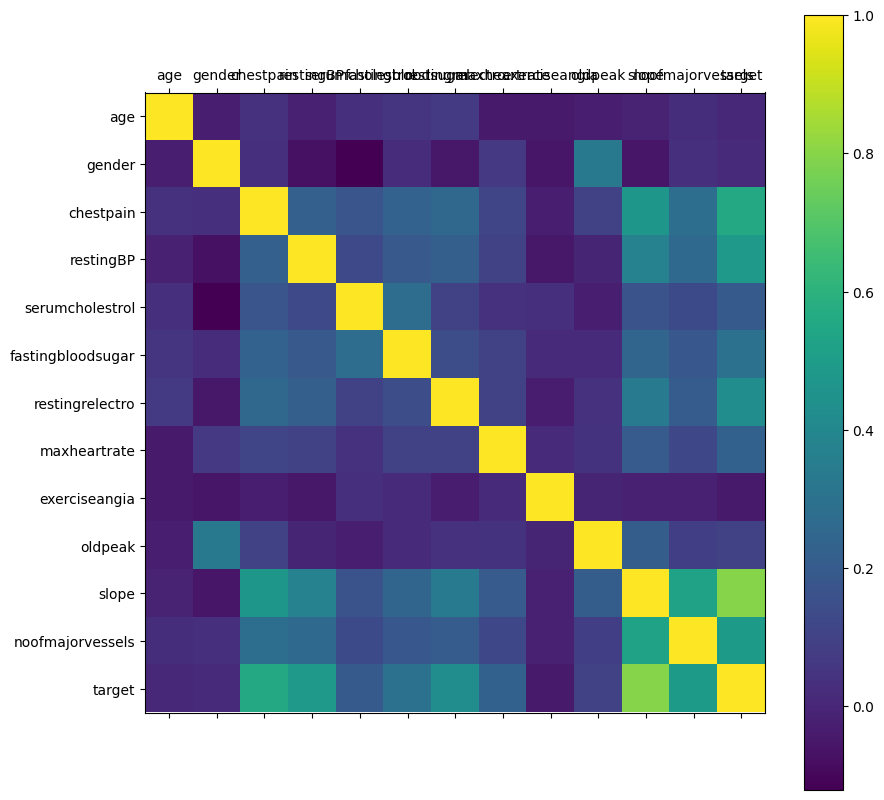

In [45]:
rcParams['figure.figsize'] =10,10
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]),data.columns)
plt.xticks(np.arange(data.shape[1]),data.columns)
plt.colorbar()

In [46]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
age,1.000000,-0.024717,0.037731,-0.016126,0.035439,0.049732,0.067736,-0.040092,-0.037581,-0.026020,-0.015334,0.025407,0.008356
gender,-0.024717,1.000000,0.035402,-0.069727,-0.120759,0.023560,-0.046634,0.064606,-0.051746,0.331457,-0.051957,0.029376,0.015769
chestpain,0.037731,0.035402,1.000000,0.222267,0.174731,0.232059,0.256316,0.114496,-0.027376,0.101345,0.472731,0.285156,0.554228
restingBP,-0.016126,-0.069727,0.222267,1.000000,0.126523,0.192063,0.219887,0.095569,-0.046545,-0.004225,0.376711,0.263194,0.482387
serumcholestrol,0.035439,-0.120759,0.174731,0.126523,1.000000,0.278337,0.101767,0.038967,0.029422,-0.025910,0.165569,0.132419,0.195340
fastingbloodsugar,0.049732,0.023560,0.232059,0.192063,0.278337,1.000000,0.143982,0.096528,0.011356,0.015311,0.242734,0.182246,0.303233
restingrelectro,0.067736,-0.046634,0.256316,0.219887,0.101767,0.143982,1.000000,0.099991,-0.032489,0.040291,0.343280,0.204684,0.426837
maxheartrate,-0.040092,0.064606,0.114496,0.095569,0.038967,0.096528,0.099991,1.000000,0.015536,0.044614,0.201515,0.122763,0.228343
exerciseangia,-0.037581,-0.051746,-0.027376,-0.046545,0.029422,0.011356,-0.032489,0.015536,1.000000,-0.003296,-0.017783,-0.017513,-0.039874
oldpeak,-0.026020,0.331457,0.101345,-0.004225,-0.025910,0.015311,0.040291,0.044614,-0.003296,1.000000,0.208789,0.086992,0.098053


In [47]:
#statistical measures about data
data.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [48]:
# checking the distribution of target variable
data['target'].value_counts()

target
1    580
0    420
Name: count, dtype: int64

In [49]:
#1 --> defective heart
#0 --> healthy heart

In [50]:
# Splitting the features and targets


In [51]:
X = data.drop(columns = 'target' , axis = 1)
Y = data['target']

In [52]:
# Splitting the data into training & testing data


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [54]:


print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000, 12) (800, 12) (200, 12) (800,) (200,)


In [55]:
# Model training

In [56]:
#Logistic Regression

In [57]:
model = LogisticRegression()


In [58]:
# training the logistic regression model with training data

In [59]:

model.fit(X_train.values, Y_train.values)


LogisticRegression()

In [60]:
X_train_prediction = model.predict(X_train.values)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train.values)

In [61]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.93875


In [62]:
X_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(Y_test.values, X_test_prediction)


In [63]:
print('Accuracy on Testing data : ', test_data_accuracy)
print(classification_report(Y_test.values, X_test_prediction))

Accuracy on Testing data :  0.95
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        95
           1       0.93      0.98      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [64]:
#building a Predictive model

In [66]:
input_data = (62,1,0,121,357,0,1,138,0,2.8,0,0)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as a we are predicting only for instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
